In [2]:
import tensorflow as tf

In [3]:
import cv2
import glob
import numpy as np
import os

In [4]:
path = '/home/aditya/6thsem/deeplearning/ass1/images/'

In [5]:
print(path)

/home/aditya/6thsem/deeplearning/ass1/images/


In [6]:
class_number =-1
x_train =[]
y_train = []
x_test = []
y_test = []
for i in [0,1]: # length
    for t in [0,1]: #Thickness
        for k in range(0,12): #angle
            for o in [0,1]:
                rel_path = str(i)+'_'+str(t)+'_'+str(k)+'_'+str(o)
                count = 0
                class_number=class_number+1
               
                for f in glob.glob(path+rel_path+'/*.jpg'):
                    if count>=600 and count<1000:
                        count = count +1
                        x_test.append(cv2.imread(f))
                        y_test.append(class_number)
                    elif count<600 :
                        count= count+1
                        x_train.append(cv2.imread(f))
                        y_train.append(class_number)
#                         break
                    else:
                        break

In [8]:
from random import shuffle

rand_num = [i for i in range(len(x_train))]
# for i in range(0,10):
#     print(rand_num[i])

shuffle(rand_num)

# print(rand_num[len(rand_num)-1])
# for i in range(0,10):
#     print(rand_num[i])

x_train1 = []
y_train1 = []
for i in range(len(x_train)):
    x_train1.append(x_train[rand_num[i]])
    y_train1.append(y_train[rand_num[i]])

    
    
# x_train1 = np.asarray(x_train1)
# y_train1 = np.asarray(y_train1)

# print(len(x_train1))
# print(len(x_train[0]))
# print(len(y_train[0]))
# print(type(x_train1))
# print(type(y_train1))

# print(y_train[0])
#

x_train =  x_train1
y_train = y_train1

In [9]:

x_test = np.asarray(x_test)
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

y_train = tf.keras.utils.to_categorical(y_train,96)
y_test = tf.keras.utils.to_categorical(y_test,96)
#(x_train, y_train),(x_test, y_test) = mnist.load_data()
#x_train, x_test = x_train / 255.0, x_test / 255.0
print(len(x_train[0]))
print(len(y_train[0]))
print(type(x_train))

28
96
<class 'numpy.ndarray'>


In [10]:
# import matplotlib.pyplot as plt
# fig = plt.figure()
# for i in range(9):
#   plt.subplot(3,3,i+1)
#   plt.tight_layout()
#   plt.imshow(x_train[i], cmap='gray', interpolation='none')
#   plt.title("Digit: {}".format(y_train[i]))
#   plt.xticks([])
#   plt.yticks([])
# fig

In [11]:
# print(len(x_train))

In [12]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 3)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 3)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train/=255
x_test/=255


In [17]:
# model = tf.keras.models.Sequential([
#   tf.keras.layers.Flatten(input_shape=(28, 28)),
#   tf.keras.layers.Dense(512, activation=tf.nn.relu),
#   tf.keras.layers.Dropout(0.2),
#   tf.keras.layers.Dense(10, activation=tf.nn.softmax)
# ])

model = tf.keras.Sequential()
# model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Conv2D(filters=6,kernel_size=(6,6),padding='same', activation ='relu',input_shape = (28,28,3)))
model.add(tf.keras.layers.Conv2D(filters=12,kernel_size=(5,5),strides=(2, 2),padding='same', activation ='relu'))
model.add(tf.keras.layers.Conv2D(filters=24,kernel_size=(4,4),strides=(2, 2),padding='same', activation ='relu'))

# model.add(tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None))
# model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(200,activation ='relu'))
# model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(96, activation ="softmax"))

In [18]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [1]:
model.summary()

NameError: name 'model' is not defined

In [20]:
history = model.fit(x_train, y_train,validation_split=0.05 ,epochs=5)
model.evaluate(x_test, y_test)


Train on 54720 samples, validate on 2880 samples
Epoch 1/5
54720/54720 [==============================] - 92s 2ms/step - loss: 1.3403 - acc: 0.5825 - val_loss: 0.4073 - val_acc: 0.8417
Epoch 2/5
54720/54720 [==============================] - 88s 2ms/step - loss: 0.2631 - acc: 0.8997 - val_loss: 0.1721 - val_acc: 0.9271
Epoch 3/5
54720/54720 [==============================] - 86s 2ms/step - loss: 0.1521 - acc: 0.9433 - val_loss: 0.1910 - val_acc: 0.9302
Epoch 4/5
54720/54720 [==============================] - 61s 1ms/step - loss: 0.1095 - acc: 0.9599 - val_loss: 0.0872 - val_acc: 0.9677
Epoch 5/5
38400/38400 [==============================] - 8s 208us/step


[0.04020467574582849, 0.9848697916666667]

In [25]:
y_pred = model.predict(x_test)

In [26]:
y_pred1 = []
  
y_pred1 =np.argmax(y_pred,axis=1) 
print(y_pred1)
# for i in y_pred1:
#     print(i)   
    
y_test = np.argmax(y_test,axis =1)
print(y_pred1)

[ 0  0  0 ... 95 95 95]
[ 0  0  0 ... 95 95 95]


In [27]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test, y_pred1)
print(type(cf))


<class 'numpy.ndarray'>


In [28]:
import sys
from sklearn.metrics import f1_score
fscore = f1_score(y_test,y_pred1,average=None)
print(fscore)
np.set_printoptions(threshold=sys.maxsize)
# print(cf)
np.savetxt("line_cf2.csv", cf, delimiter=",")
np.savetxt("line_fscore2.csv", fscore, delimiter=",")

[0.9913259  0.88208617 0.99009901 0.78145695 0.98989899 0.75223881
 1.         1.         1.         0.99625468 1.         0.9706258
 1.         0.94160584 1.         0.94409938 1.         0.96410256
 0.99749373 1.         1.         0.91428571 0.99117276 0.79881657
 1.         0.96551724 0.99750623 0.96645963 0.99749373 0.97055058
 0.99875156 0.98503741 0.99874844 0.98873592 0.988622   0.96930946
 0.98511166 0.95798319 0.9937578  0.97193878 0.99750623 0.98881988
 0.995      0.96954933 0.99750623 0.96410256 1.         0.97236181
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.     



dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


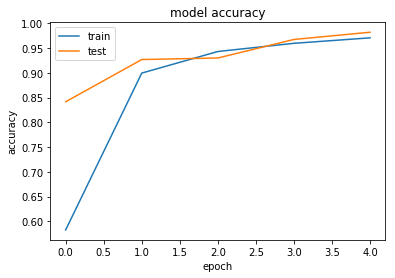

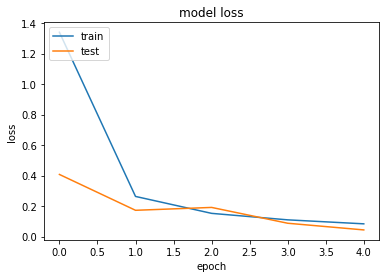

In [24]:
# history = model.fit(x=x_train,y=y_train, epochs=20, validation_split=0.33)
import matplotlib.pyplot as plt

# plot learning curves

print("\n")
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()